In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression




#**Data import**
Let us read the CSV file into a datafield df:

In [75]:
df = pd.read_csv('/content/diabetes2.csv')

Now, print the first few rows to make sure our data field is loaded

In [76]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


# **Data Cleanup**

Let us first check if any null values are present

In [77]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               5
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The above data clearly shows that there are 5 null values in the SkinThickness field. Let us print the rows in whoch the null values are present.

In [78]:
df[df['SkinThickness'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
18,1,103,30,NaN,83,43.3,0.183,33,0
27,1,97,66,NaN,140,23.2,0.487,22,0
30,5,109,75,NaN,0,36.0,0.546,60,0
598,1,173,74,NaN,0,36.8,0.088,38,1
676,9,156,86,NaN,0,24.8,0.230,53,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             763 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


In [80]:
df.shape

(768, 9)

As the number of null values is very small compared to the number of entries in our dataset, let us drop the rows in which null values are present

In [81]:
df.drop(df.loc[df['SkinThickness'].isnull()].index,inplace = True)

Verify if the null values are dropped.

In [82]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now, remove any duplicates in the dataset

In [83]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [84]:
df.shape 

(763, 9)

The above result shows that 5 rows were dropped as they were duplicates

In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.847969,120.850590,69.124509,20.567497,80.030144,31.987156,0.472958,33.188729,0.348624
std,3.370469,31.975281,19.355467,15.954795,115.492136,7.885384,0.331829,11.728603,0.476847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.550000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


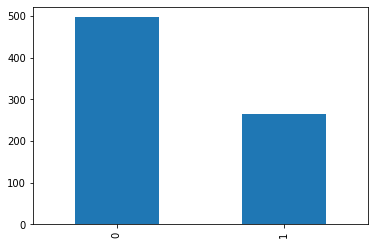

In [86]:
df.Outcome.value_counts().plot(kind='bar')
plt.show()

In [87]:
df.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.303823,110.022133,68.251509,19.623742,68.758551,30.280885,0.429881,31.146881
1,4.864662,141.082707,70.755639,22.330827,101.090226,35.175188,0.553444,37.003759


Check out the data in Glucose Column

**Analysis of the data of diabatic people**

In [88]:
df[df.Outcome == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
2,8,183,64,0.0,0,23.3,0.672,32,1
4,0,137,40,35.0,168,43.1,2.288,33,1
6,3,78,50,32.0,88,31.0,0.248,26,1
8,2,197,70,45.0,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39.0,110,36.5,1.057,37,1
757,0,123,72,0.0,0,36.3,0.258,52,1
759,6,190,92,0.0,0,35.5,0.278,66,1
761,9,170,74,31.0,0,44.0,0.403,43,1


We have to remove the Outliers else it would affect the output, As it is observed that women who are diabatic have an mean glucose of 140+ this indicates that the glucose is high for diabitic patients and hence it cannot be 0. And this data should be removed

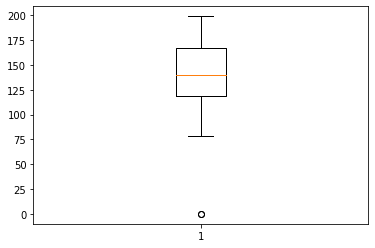

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32.0,0,41.0,0.346,37,1
502,6,0,68,41.0,0,39.0,0.727,41,1


In [89]:
plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df[((df.Outcome == 1) & (df.Glucose == 0))]

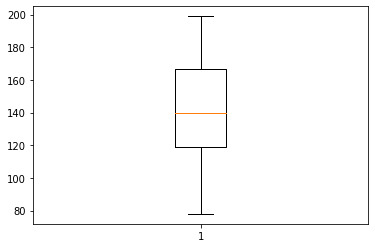

(761, 9)

In [90]:
df = df[~((df.Outcome == 1) & (df.Glucose == 0))]

plt.boxplot(df[df.Outcome == 1].Glucose)
plt.show()
df.shape

**Analysis of the data of non-diabatic people**

In [91]:
df[(df.Outcome == 0) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29.0,0,26.6,0.351,31,0
3,1,89,66,23.0,94,28.1,0.167,21,0
5,5,116,74,0.0,0,25.6,0.201,30,0
7,10,115,0,0.0,0,35.3,0.134,29,0
10,4,110,92,0.0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0.0,0,22.5,0.142,33,0
763,10,101,76,48.0,180,32.9,0.171,63,0
764,2,122,70,27.0,0,36.8,0.340,27,0
765,5,121,72,23.0,112,26.2,0.245,30,0


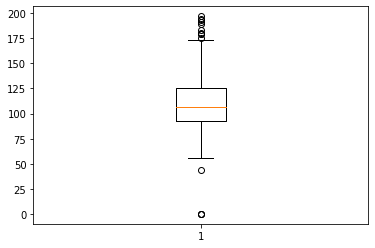

In [92]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

Descriibe the values for a non diabetic person

In [93]:
df[df.Outcome == 0].Glucose.describe()

count    497.000000
mean     110.022133
std       26.211714
min        0.000000
25%       93.000000
50%      107.000000
75%      125.000000
max      197.000000
Name: Glucose, dtype: float64

In [94]:
Q1 = df[df.Outcome == 0].Glucose.quantile(0.25)
Q2 = df[df.Outcome == 0].Glucose.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.Glucose < (Q1 - 1.5 * IQR)) |(df.Glucose > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]


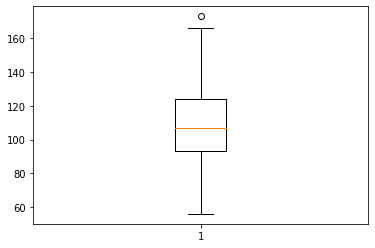

count    483.000000
mean     109.269151
std       22.387247
min       56.000000
25%       93.000000
50%      107.000000
75%      124.000000
max      173.000000
Name: Glucose, dtype: float64

In [95]:
plt.boxplot(df[df.Outcome == 0].Glucose)
plt.show()

df[df.Outcome == 0].Glucose.describe()

**Analyse the data in BloodPressure Column**


**Check out for diabatic women**

In [96]:
df[df.Outcome == 1].BloodPressure.describe()

count    264.000000
mean      70.731061
std       21.625213
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

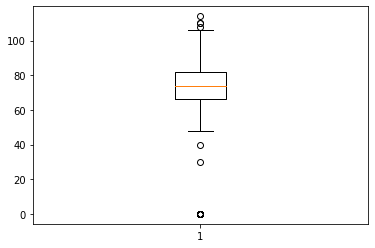

In [97]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [98]:
Q1 = df[df.Outcome == 1].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 1].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 1))]


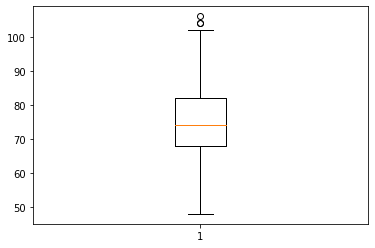

In [99]:
plt.boxplot(df[df.Outcome == 1].BloodPressure)
plt.show()

In [100]:
print(df[df.Outcome == 1].BloodPressure.describe())
print(df.shape)

count    242.000000
mean      75.045455
std       11.062347
min       48.000000
25%       68.000000
50%       74.000000
75%       82.000000
max      106.000000
Name: BloodPressure, dtype: float64
(725, 9)


**Check out for non-diabatic women**

In [101]:
df[df.Outcome == 0].BloodPressure.describe()

count    483.000000
mean      68.074534
std       18.036116
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

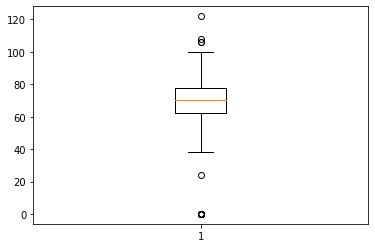

In [102]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [103]:
Q1 = df[df.Outcome == 0].BloodPressure.quantile(0.25)
Q2 = df[df.Outcome == 0].BloodPressure.quantile(0.75)
IQR = Q2 - Q1

df = df[~(((df.BloodPressure < (Q1 - 1.5 * IQR)) |(df.BloodPressure > (Q2 + 1.5 * IQR))) & (df.Outcome == 0))]


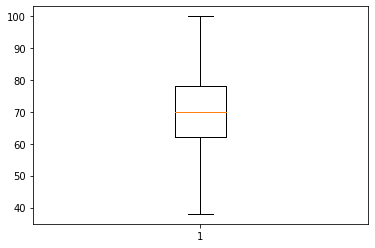

In [104]:
plt.boxplot(df[df.Outcome == 0].BloodPressure)
plt.show()

In [105]:
df[df.Outcome == 0].BloodPressure.describe()

count    459.000000
mean      70.618736
std       11.102370
min       38.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      100.000000
Name: BloodPressure, dtype: float64

In [106]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,0.0,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
5,5,116,74,0.0,0,25.6,0.201,30,0
6,3,78,50,32.0,88,31.0,0.248,26,1
8,2,197,70,45.0,543,30.5,0.158,53,1
9,8,125,96,0.0,0,0.0,0.232,54,1
10,4,110,92,0.0,0,37.6,0.191,30,0
11,10,168,74,0.0,0,38.0,0.537,34,1


**Separating the dataset**

In [107]:
X = df.drop(columns = 'Outcome', axis = 1)
Y = df.Outcome

print(X,Y)


     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
5              5      116             74  ...  25.6                     0.201   30
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[70

**Data Standardization**

In [108]:
scaler = StandardScaler()
Standard_data  = scaler.fit_transform(X)

In [109]:
X = Standard_data
print(X)
print(Y)

[[ 0.64870081  0.90452796 -0.01303637 ...  0.2046469   0.47621031
   1.43652398]
 [-0.84715205 -1.21252479 -0.54537594 ... -0.78257521 -0.38059891
  -0.18560937]
 [ 1.24704196  2.08066838 -0.72282246 ... -1.24797992  0.61590746
  -0.10023393]
 ...
 [ 0.34953024 -0.00278036 -0.01303637 ... -0.8389879  -0.70966332
  -0.27098481]
 [-0.84715205  0.1652397  -1.07771551 ... -0.28896416 -0.38680767
   1.18039766]
 [-0.84715205 -0.94369269 -0.19048289 ... -0.24665464 -0.49235663
  -0.86861289]]
0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 701, dtype: int64


***Train Test Split***

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,stratify = Y, random_state = 1)


In [111]:
print(X.shape, X_train.shape, X_test.shape)

(701, 8) (560, 8) (141, 8)


**Train the Model**

**(1) SVM Classifier**

In [112]:
classifier1 = svm.SVC(kernel='linear')
classifier1.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Model Evaluation**

**Determining Accuracy Score**

In [113]:
X_train_predict = classifier1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict, Y_train)
training_data_accuracy

0.7875

In [114]:
X_test_predict = classifier1.predict(X_test)

test_data_accuracy = accuracy_score(X_test_predict, Y_test)

test_data_accuracy

0.7801418439716312

**Predicting Model**

In [115]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,85,66,29,0,26.6,0.351,31)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = classifier1.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


**Train the Model**

**(2) Logistic Regression**

In [116]:
classifier2 = LogisticRegression()


classifier2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Model Evaluation**

**Determining Accuracy Score**

In [117]:
X_train_predict = classifier2.predict(X_train)

training_data_accuracy = accuracy_score(X_train_predict, Y_train)

print(training_data_accuracy)

0.7839285714285714


**Test Model**

In [118]:
X_test_predict = classifier2.predict(X_test)

test_data_accuracy = accuracy_score(X_test_predict, Y_test)

print(test_data_accuracy)

0.7872340425531915


The accuracy is almost 0.8, which means we can proceed with building a prediction model

**Predicting Model**

In [119]:
input_data1 = (4,150,79,34,0,33.6,0.627,54)
input_data2 = (1,95,61,24,0,22.6,0.761,32)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data1)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = classifier2.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Diabetic


In [120]:
input_data1 = (6,148,72,35,0,33.6,0.627,50)
input_data2 = (1,95,61,24,0,22.6,0.761,32)

#Changing Input Data As Numpy Array
input_data_array = np.asarray(input_data2)

# Reshape the data as we are predicting for only one instance
input_data_reshape = input_data_array.reshape(1,-1)

# Standardize the data
std_data = scaler.transform(input_data_reshape)

# Prediction
prediction = classifier2.predict(std_data)
#print(prediction)

if prediction == 0:
    print('Person is Not Diabetic')
else:
    print('Person is Diabetic')

Person is Not Diabetic
